In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import BayesianRidge as BR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.externals.joblib import dump,load
from sklearn.model_selection import GridSearchCV as GSCV

%matplotlib inline

In [2]:
ML_df = pd.read_csv("data\ML_dataset.csv")

In [3]:
Labels = ML_df.columns[:6].tolist() #columns of drugs

print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count']


In [4]:
X = ML_df[Labels].values #input
y = ML_df["brand_percent_spending"].values #label
# Seperate into attributes and Labels
#print(X)
#print(len(X))
#print(len(y))
#print(y)

In [5]:
PCA = PCA(n_components = 'mle')
PCA.fit_transform(X)

array([[-9.71514450e+04,  2.11533240e+04, -1.27295505e+03,
         6.60033468e+02, -2.84305173e+02],
       [-2.39303720e+05,  4.38967784e+04, -1.43359333e+03,
         1.69423084e+02, -4.31410770e+00],
       [-2.31345603e+05,  4.07929591e+04, -1.03933486e+03,
         1.45269599e+02,  1.56942771e+01],
       ...,
       [-2.34905620e+05,  4.53307718e+04, -1.64323611e+03,
         1.79500585e+02, -3.39543109e+00],
       [-2.32484850e+05,  4.19306074e+04, -1.42455725e+03,
         1.67580175e+02, -3.13285167e+01],
       [-2.38689623e+05,  3.86214766e+04, -1.08528825e+03,
         1.82468376e+02, -4.67853871e+01]])

In [6]:
print(PCA.explained_variance_ratio_) 

[9.13293350e-01 8.66777129e-02 1.62913224e-05 1.18608346e-05
 7.80144034e-07]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#seperate into Training and Test Data

In [8]:
#other kernel options: linear, poly, rbf, sigmoid, precomputed 
brregressor = BR(tol = 1e-4, normalize = True, compute_score = True, verbose=True)
brregressor.fit(X_train,y_train)

Convergence after  4  iterations


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.0001, verbose=True)

In [9]:
print(brregressor.coef_)

[ 2.47404407e-03  6.15003512e-06 -2.63706438e-06  1.06461559e-07
  3.57850136e-07 -9.69258706e-06]


In [10]:
coeff_df = pd.DataFrame( brregressor.coef_, Labels, columns=['coefficient'])  
coeff_df = coeff_df[coeff_df["coefficient"] != 0]
coeff_df.sort_values("coefficient" ,ascending = False)

,coefficient
specialty_description,2.474044e-03
nppes_provider_city,6.150035e-06
total_day_supply,3.578501e-07
total_drug_cost,1.064616e-07
total_claim_count,-2.637064e-06
total_30_day_fill_count,-9.692587e-06


In [11]:
#predictions
y_pred =brregressor.predict(X_test)

In [12]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)

,Actual,Predicted
0,0.911246,0.658687
1,0.758752,0.663903
2,0.301580,0.526019
3,0.494988,0.713743
4,0.373668,0.469976
5,0.876037,0.848305
6,0.230109,0.477694
7,0.559835,0.597197
8,0.910102,0.750502
9,0.925784,0.711836


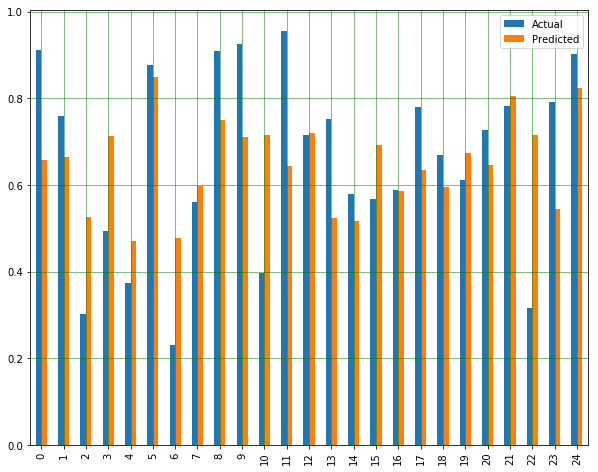

In [13]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

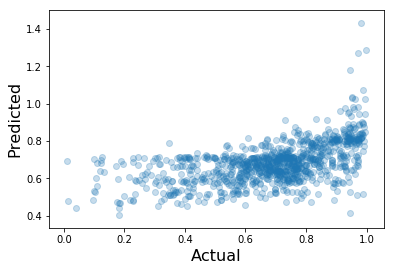

In [14]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

In [15]:
print("r Squared:", metrics.r2_score(y_test, y_pred))

r Squared: 0.26477663736471113
